# Jupyter Notebook

In [1]:
print("Hello João Gomes")

Hello João Gomes


In [2]:
import numpy as np

# sigmoid function to normalize inputs
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# sigmoid derivatives to adjust synaptic weights
def sigmoid_derivative(x):
    return x * (1 - x)

# input dataset
training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])

# output dataset
training_outputs = np.array([[0,1,1,0]]).T

# seed random numbers to make calculation
np.random.seed(1)

# initialize weights randomly with mean 0 to create weight matrix, synaptic weights
synaptic_weights = 2 * np.random.random((3,1)) - 1

print('Random starting synaptic weights: ')
print(synaptic_weights)

# Iterate 10,000 times
for iteration in range(10000):

    # Define input layer
    input_layer = training_inputs
    # Normalize the product of the input layer with the synaptic weights
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))

    # how much did we miss?
    error = training_outputs - outputs

    # multiply how much we missed by the
    # slope of the sigmoid at the values in outputs
    adjustments = error * sigmoid_derivative(outputs)

    # update weights
    synaptic_weights += np.dot(input_layer.T, adjustments)

print('Synaptic weights after training: ')
print(synaptic_weights)

print("Output After Training:")
print(outputs)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Output After Training:
[[0.00966449]
 [0.99211957]
 [0.99358898]
 [0.00786506]]


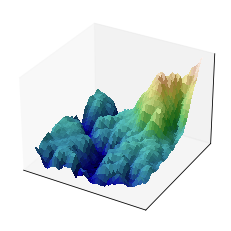

In [3]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
fig.savefig("surface3d_frontpage.png", dpi=25)  # results in 160x120 px image